In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('engine_data.csv\engine_data.csv')

In [3]:
df.shape

(19535, 7)

In [2]:
df.sample

<bound method NDFrame.sample of        Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0             700          2.493592      11.790927          3.178981   
1             876          2.941606      16.193866          2.464504   
2             520          2.961746       6.553147          1.064347   
3             473          3.707835      19.510172          3.727455   
4             619          5.672919      15.738871          2.052251   
...           ...               ...            ...               ...   
19530         902          4.117296       4.981360          4.346564   
19531         694          4.817720      10.866701          6.186689   
19532         684          2.673344       4.927376          1.903572   
19533         696          3.094163       8.291816          1.221729   
19534         504          3.775246       3.962480          2.038647   

       lub oil temp  Coolant temp  Engine Condition  
0         84.144163     81.632187                

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [4]:
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


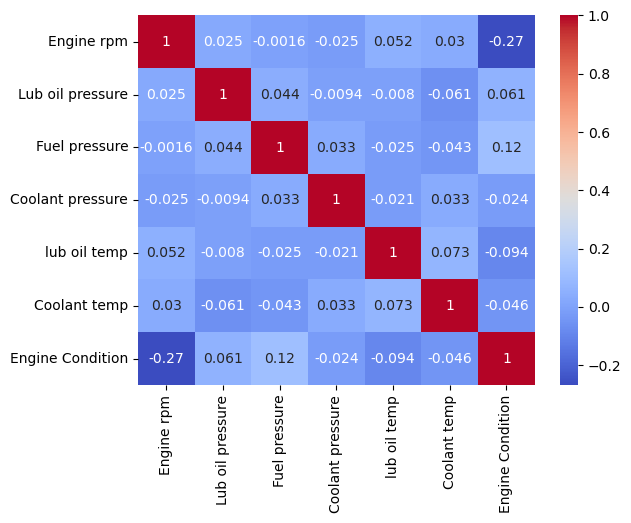

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

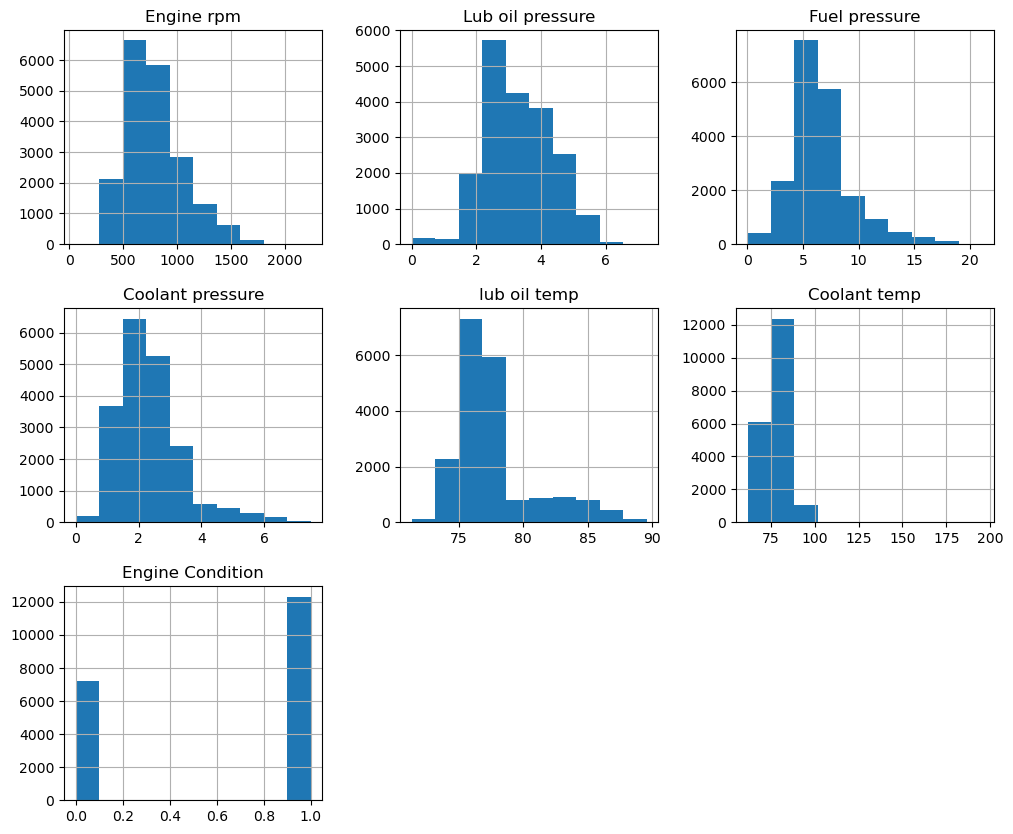

In [9]:
df.hist(figsize=(12, 10))
plt.show()

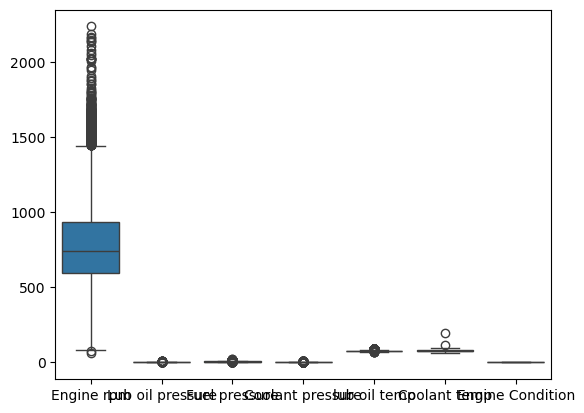

In [10]:
sns.boxplot(data=df)
plt.show()

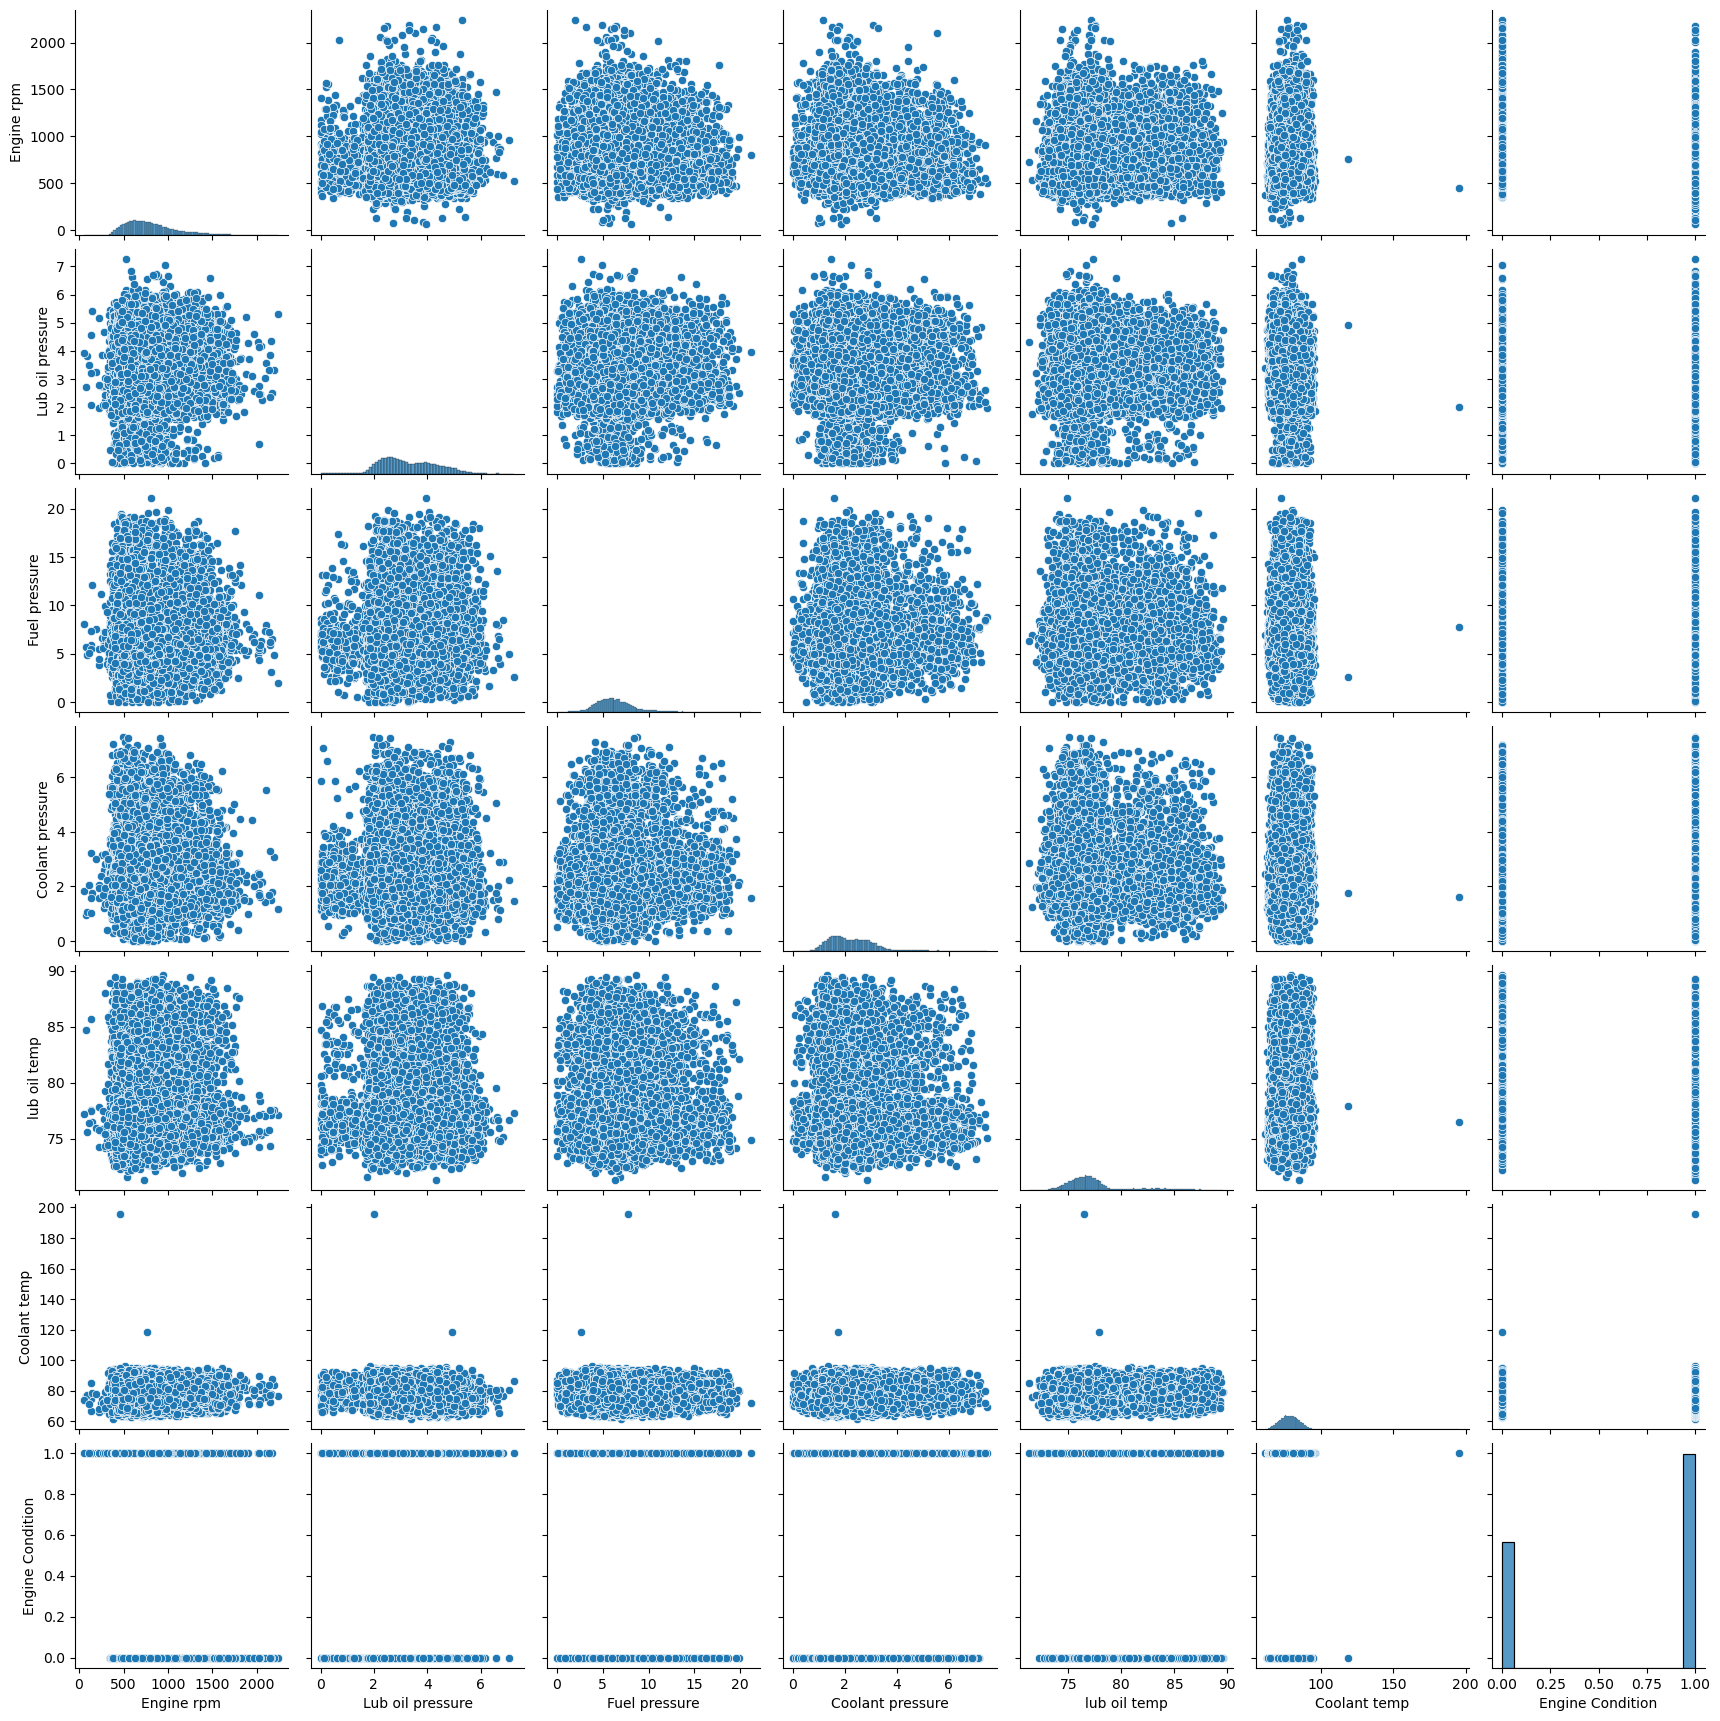

In [11]:
sns.pairplot(df)
plt.show()

In [3]:
# Define features and target
features = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
             'lub oil temp', 'Coolant temp']
target = 'Engine Condition'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize and fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.6442283081648323
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.27      0.36      1459
           1       0.67      0.87      0.75      2448

    accuracy                           0.64      3907
   macro avg       0.61      0.57      0.56      3907
weighted avg       0.62      0.64      0.61      3907



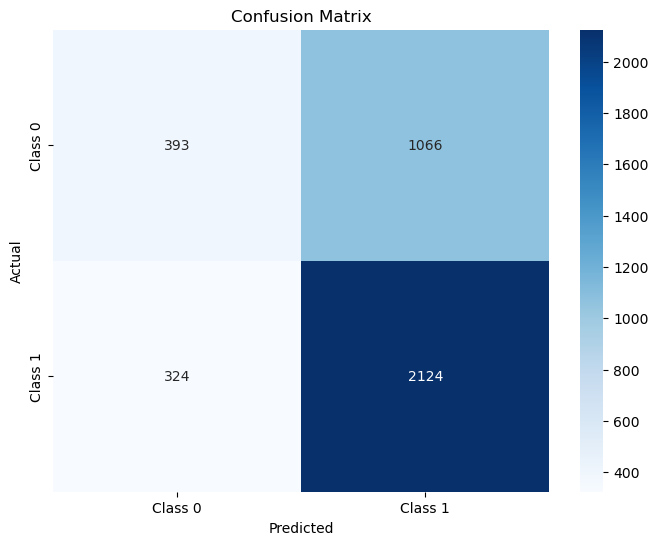

In [5]:
# Make predictions
y_pred = log_reg.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

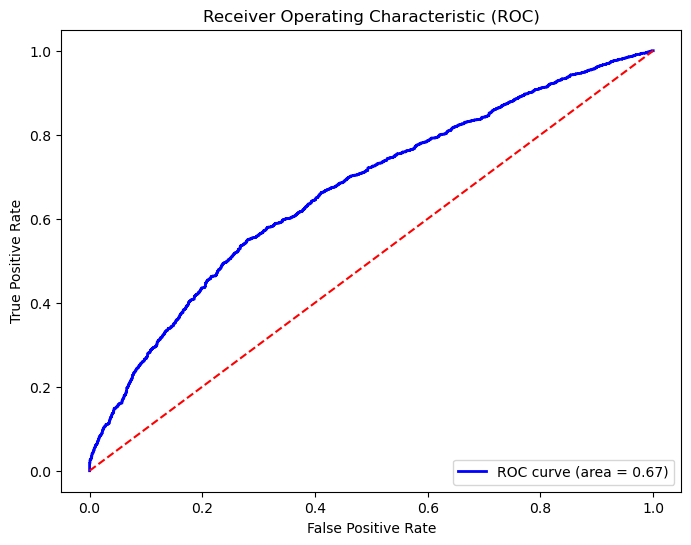

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()